In [1]:
import numpy as np
def majority_heads_biased(n,p=0.51):
    successes=0
    for i in range( n):
        if np.random.random()>1-p:
            successes+=1
    return successes>500
print(majority_heads_biased(1000))


True


In [2]:
from scipy.stats import binom, norm
import math

def majority_heads_binom (n,p=0.51):
    majority=math.ceil( n/2)
    return sum( binom.pmf(k,n,p) for k in range( majority, n+1))
print(majority_heads_binom(1000))


0.7467502275563255


In [3]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


X,y=make_moons( n_samples=500,noise=0.30, random_state=42)
X_train,X_test,y_train,y_test=train_test_split( X,y, random_state=42)


voting_clf=VotingClassifier (
    estimators=[
         ('lr',LogisticRegression (random_state=42)),
         ('rf',RandomForestClassifier(random_state=42 )),
         ('svc',SVC( random_state=42, probability=True))
          ]
)
voting_clf.fit( X_train, y_train)
voting_clf.score( X_train, y_train)

0.936

In [4]:
voting_clf.estimators

[('lr', LogisticRegression(random_state=42)),
 ('rf', RandomForestClassifier(random_state=42)),
 ('svc', SVC(probability=True, random_state=42))]

In [5]:
voting_clf.named_estimators_

{'lr': LogisticRegression(random_state=42),
 'rf': RandomForestClassifier(random_state=42),
 'svc': SVC(probability=True, random_state=42)}

In [6]:
for name , clf in voting_clf.named_estimators_.items():
    print( name,clf.score(X_test,y_test))

lr 0.864
rf 0.896
svc 0.896


In [7]:
voting_clf.predict(X_test[:1])

array([1])

In [ ]:
[estimator.predict( X_test[:1]) for estimator in voting_clf estimators_]

SyntaxError: invalid syntax (<ipython-input-8-0c94bafa5595>, line 1)

In [8]:
voting_clf.voting='soft'
voting_clf.score( X_test,y_test)

0.92

# Bagging and Pasting

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf=BaggingClassifier( DecisionTreeClassifier(),n_estimators=500,
                          max_samples=100,bootstrap=True,n_jobs=-1)
bag_clf.fit( X_train,y_train)
bag_clf.score( X_test,y_test)

0.912

In [10]:
tree_clf=DecisionTreeClassifier()
tree_clf.fit( X_train,y_train)
tree_clf.score( X_test,y_test)

0.864

# 00B evaluation-> Out of bag evaluation

In [11]:
bag_clf=BaggingClassifier( DecisionTreeClassifier(),n_estimators=500,
                          bootstrap=True,n_jobs=-1, oob_score=True)

bag_clf.fit(X_train,y_train)
bag_clf.score(X_test,y_test )

0.92

In [12]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf= RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                n_jobs=-1, random_state=42)
rnd_clf.fit( X_train,y_train)
rnd_clf.score( X_test,y_test)

0.912

In [16]:

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(
        max_features='sqrt',
        max_leaf_nodes=16,
        splitter='best'  #
    ),
    n_estimators=500,
    random_state=42
)

# Fit the model
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_features='sqrt',
                                                   max_leaf_nodes=16),
                  n_estimators=500, random_state=42)

In [17]:
bag_clf.score( X_test,y_test)

0.912

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
ext_clf=ExtraTreesClassifier(n_estimators=500,max_leaf_nodes=16,
                            n_jobs=-1,random_state=42)
ext_clf.fit( X_train,y_train)
ext_clf.score( X_test,y_test)

0.912

In [19]:
from sklearn.datasets import load_iris
iris=load_iris()
rnd_clf=RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit( iris['data'], iris['target'])
for name,score in zip ( iris['feature_names'],rnd_clf.feature_importances_):
    print( name,score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


# Boosting

# AdaBoosting

In [20]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf= AdaBoostClassifier( DecisionTreeClassifier( max_depth=1),
                              n_estimators=200,
                               learning_rate=0.5,random_state=42)
ada_clf.fit( X_train,y_train)
ada_clf.score( X_test,y_test)

0.896

# Gradient Boosting

In [22]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
np.random.seed( 42)
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2+0.05*np.random.randn( 100)

tree_reg1=DecisionTreeRegressor( max_depth=2,random_state=42)
tree_reg1.fit( X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [23]:
tree_reg2=DecisionTreeRegressor( max_depth=2,random_state=42)
y2=y-tree_reg1.predict(X)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [24]:
tree_reg3=DecisionTreeRegressor( max_depth=2,random_state=42)
y3=y2-tree_reg1.predict(X)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt=GradientBoostingRegressor( max_depth=2,n_estimators=3,
                               learning_rate=1.0,random_state=42)

gbrt.fit( X,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [30]:
gbrt_best = GradientBoostingRegressor(
    max_depth=2, learning_rate=0.05, n_estimators=500,
    n_iter_no_change=10, random_state=42)
gbrt_best.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [31]:
gbrt_best.n_estimators_

92

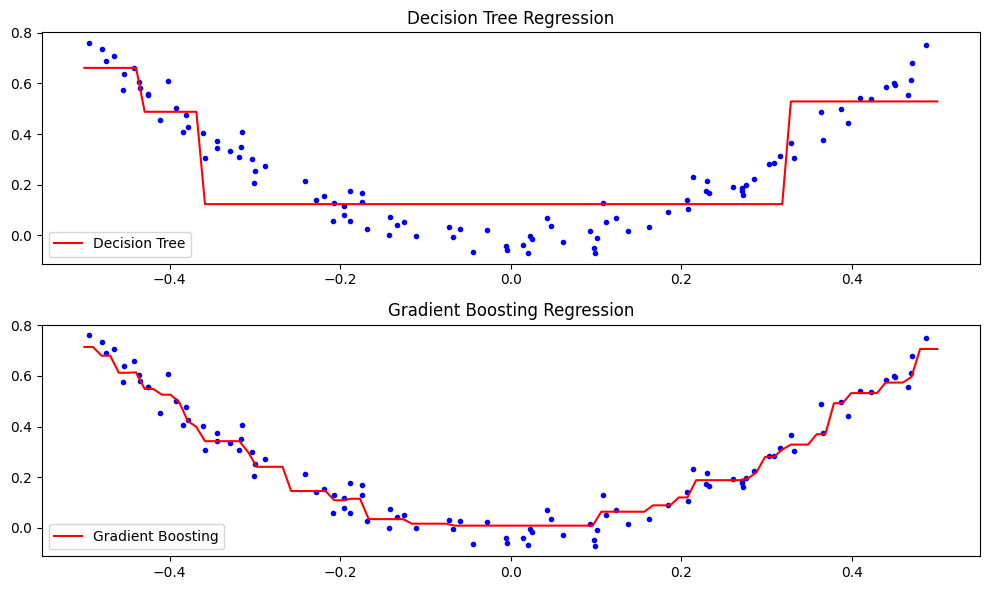

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Assuming X, y, and gbrt_best are already defined
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
X_new = np.linspace(-0.5, 0.5, 100).reshape(-1, 1)

tree_reg.fit(X, y)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(211)
plt.plot(X, y, 'b.')
plt.plot(X_new, tree_reg.predict(X_new), 'r-', label="Decision Tree")
plt.title("Decision Tree Regression")
plt.legend()

plt.subplot(212)
plt.plot(X, y, 'b.')
plt.plot(X_new, gbrt_best.predict(X_new), 'r-', label="Gradient Boosting")
plt.title("Gradient Boosting Regression")
plt.legend()

plt.tight_layout()
plt.show()


# Extra Gradient Bossting

In [34]:
from xgboost import XGBRegressor

xgb_reg= XGBRegressor(random_state=42)
xgb_reg.fit( X,y)
xgb_reg.score( X,y)

0.9998913626632905

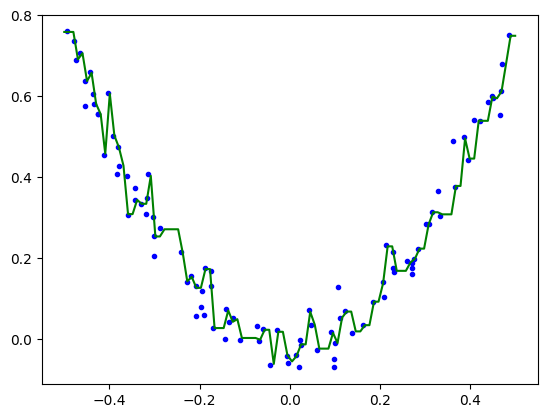

In [35]:
plt.plot( X,y,'b.')
plt.plot( X_new,xgb_reg.predict(X_new),'g-',label='Boosted')

# CatBoost

In [36]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.5 MB/s eta 0:00:00


In [37]:
from catboost import CatBoostRegressor,Pool
catboost=CatBoostRegressor( iterations=20,learning_rate=1,depth=2)
catboost.fit( X,y)
catboost .score( X,y)

0:	learn: 0.1561849	total: 46.2ms	remaining: 879ms
1:	learn: 0.1193095	total: 46.7ms	remaining: 420ms
2:	learn: 0.1068532	total: 46.8ms	remaining: 265ms
3:	learn: 0.0919921	total: 46.9ms	remaining: 187ms
4:	learn: 0.0868724	total: 47ms	remaining: 141ms
5:	learn: 0.0838125	total: 47ms	remaining: 110ms
6:	learn: 0.0807786	total: 47.1ms	remaining: 87.5ms
7:	learn: 0.0741797	total: 47.2ms	remaining: 70.8ms
8:	learn: 0.0684957	total: 47.3ms	remaining: 57.8ms
9:	learn: 0.0622976	total: 47.3ms	remaining: 47.3ms
10:	learn: 0.0602450	total: 47.4ms	remaining: 38.8ms
11:	learn: 0.0583680	total: 47.5ms	remaining: 31.6ms
12:	learn: 0.0572640	total: 47.6ms	remaining: 25.6ms
13:	learn: 0.0565491	total: 47.6ms	remaining: 20.4ms
14:	learn: 0.0531044	total: 47.7ms	remaining: 15.9ms
15:	learn: 0.0509416	total: 47.7ms	remaining: 11.9ms
16:	learn: 0.0484136	total: 47.8ms	remaining: 8.44ms
17:	learn: 0.0476465	total: 47.9ms	remaining: 5.33ms
18:	learn: 0.0472589	total: 48ms	remaining: 2.53ms
19:	learn: 0.04

np.float64(0.9613627738851215)

In [38]:
from lightgbm import LGBMRegressor

lgbm=LGBMRegressor( max_depth=5,random_satate=42)
lgbm.fit(X,y)
lgbm.score(X,y)


[LightGBM] [Warning] Unknown parameter: random_satate
[LightGBM] [Warning] Unknown parameter: random_satate
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 35
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 1
[LightGBM] [Info] Start training from score 0.265458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.8285984586781898

# Stacking

In [39]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


stack_clf= StackingClassifier (
    estimators=[
        ('lr',LogisticRegression( random_state=42)),
        ('rf',RandomForestClassifier( random_state=42)),
        ( 'svc', SVC( random_state=42, probability=True))
    ],
    final_estimator=RandomForestClassifier( random_state=42)
)
stack_clf.fit( X_train,y_train)
stack_clf.score( X_train,y_train)

0.9386666666666666